In [21]:
import os
import utils
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

In [4]:
train_dataset, valid_dataset, test_dataset = utils.train_valid_test_split(
    range(1, 121), recurrent=False, train_ratio=0.7)

train_inputs, train_targets, train_lengths = train_dataset

In [17]:
# Split targets along break time
bp_to_index = dict()
p_to_index = dict()
for i, point in enumerate(train_inputs):
    b = int(point[4])
    P = int(point[3])
    if (b, P) not in bp_to_index:
        bp_to_index[(b, P)] = [i]
    else:
        bp_to_index[(b, P)].append(i)
        
    if P not in p_to_index:
        p_to_index[P] = [i]
    else:
        p_to_index[P].append(i)

C:\Users\Yannc\.conda\envs\cenaero\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


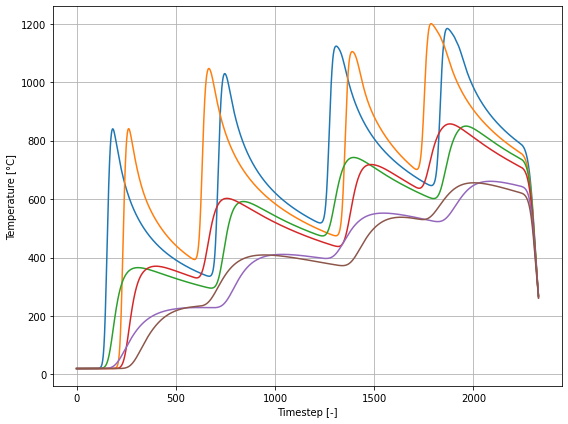

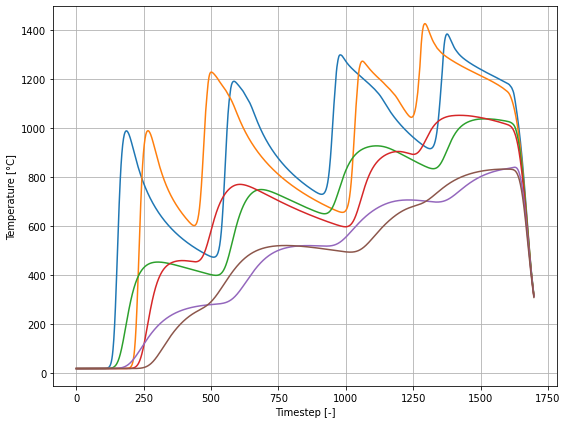

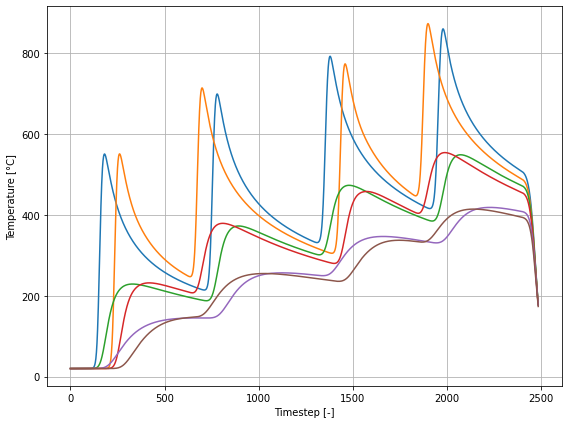

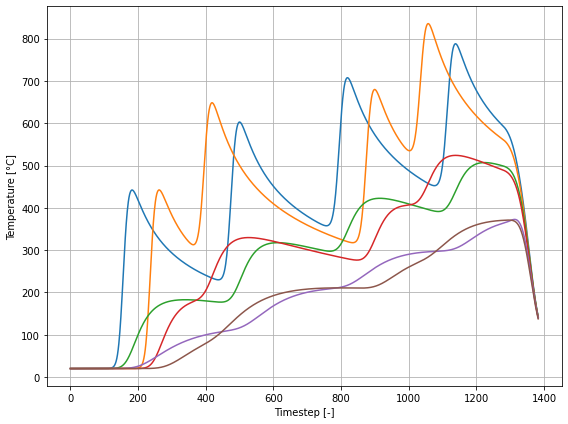

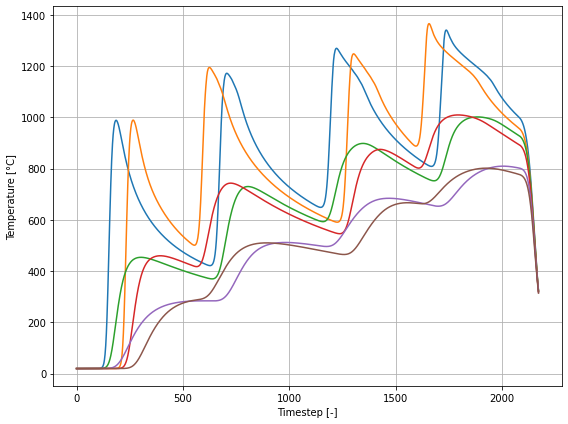

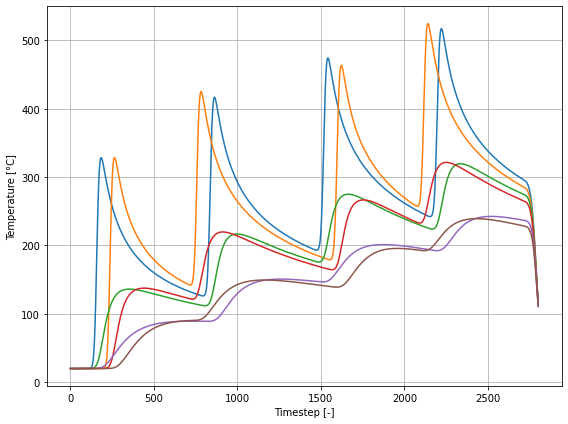

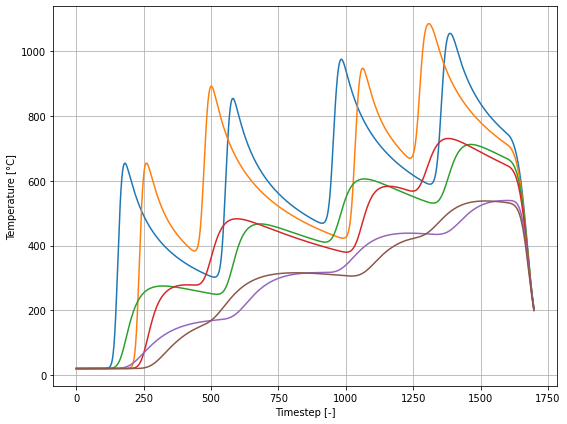

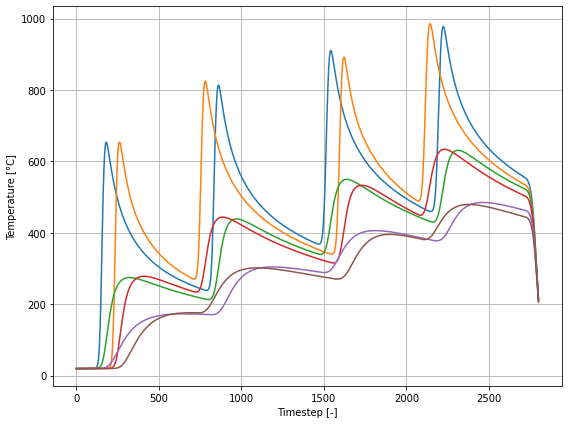

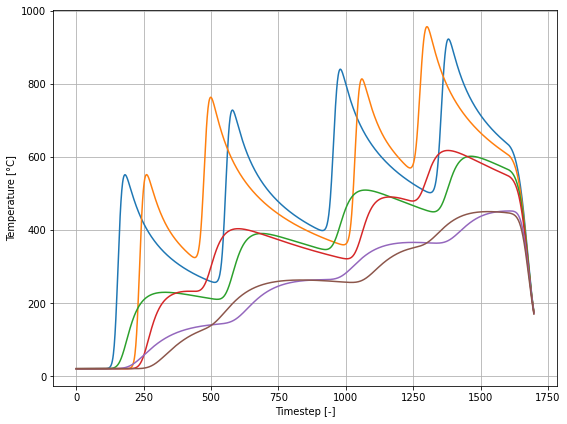

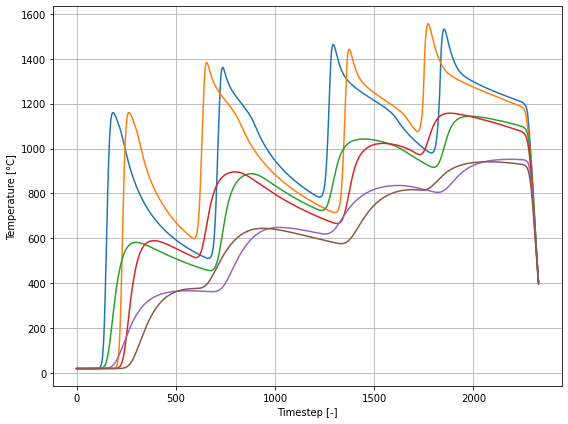

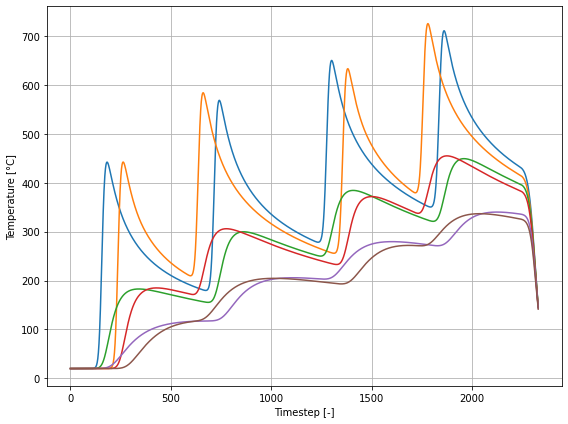

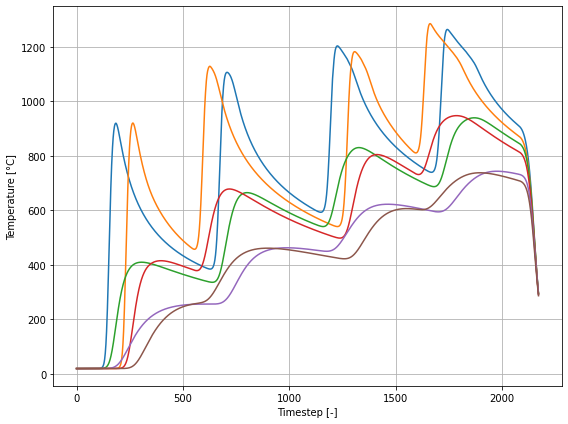

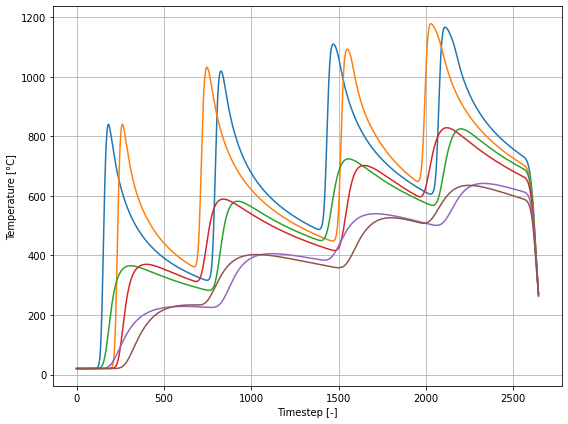

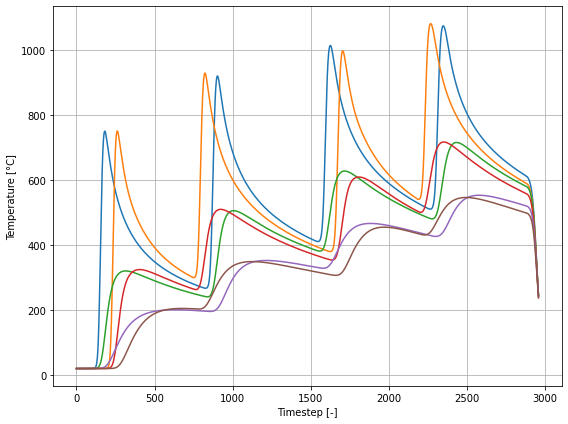

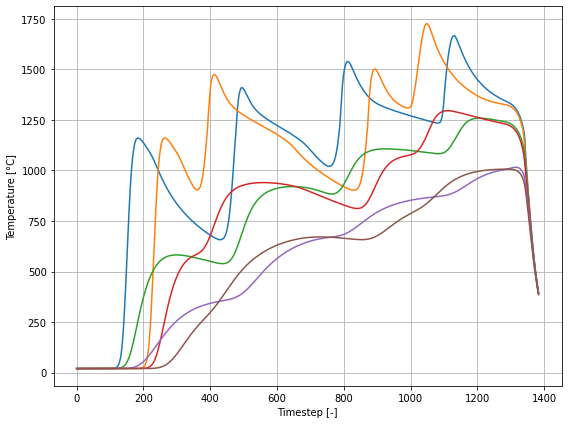

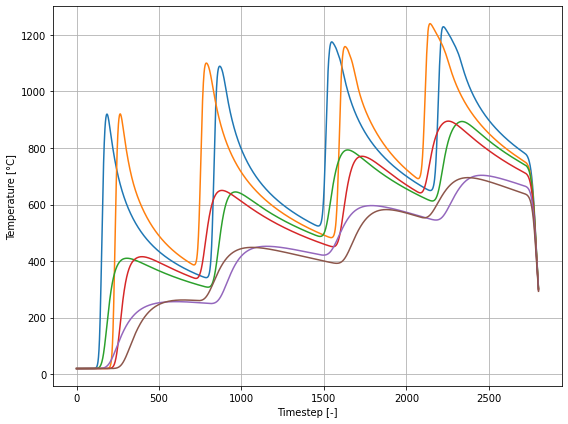

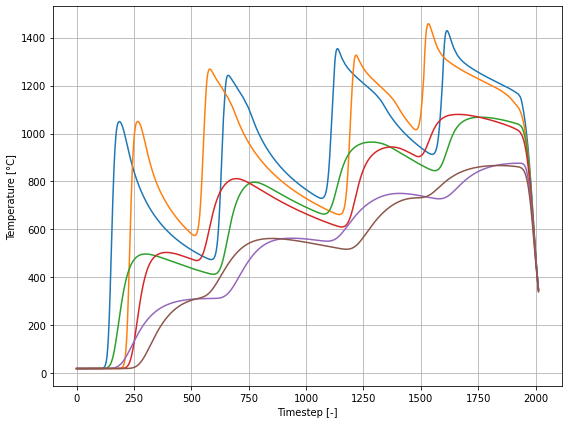

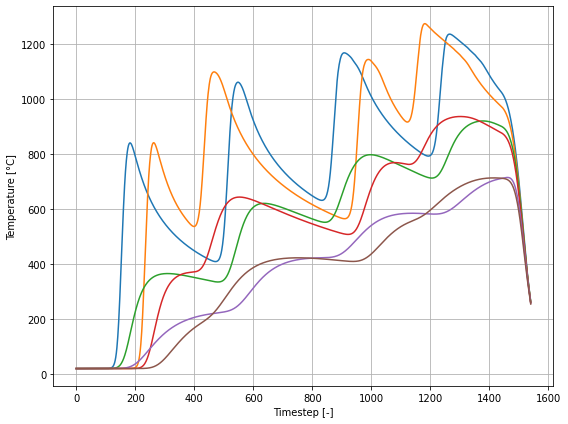

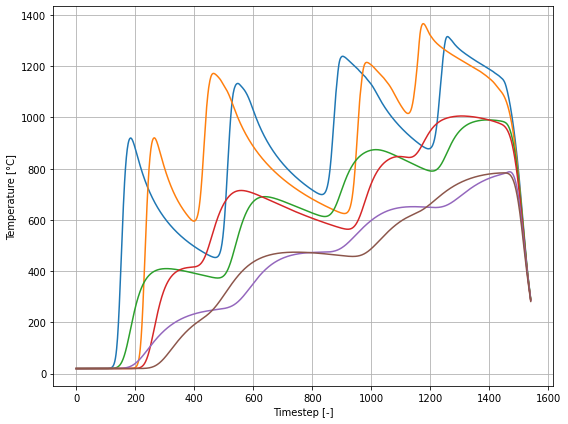

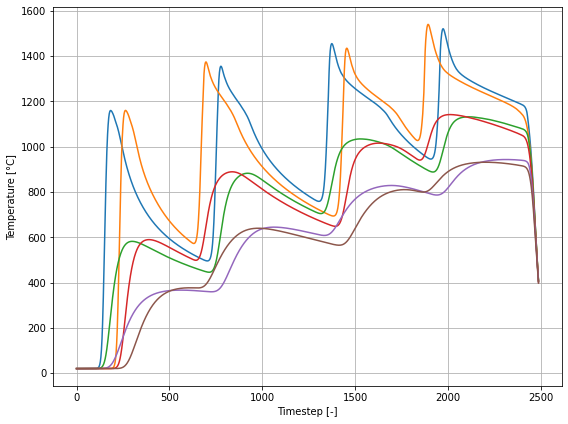

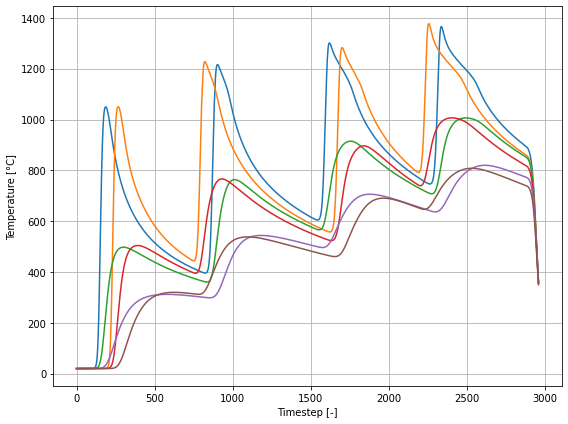

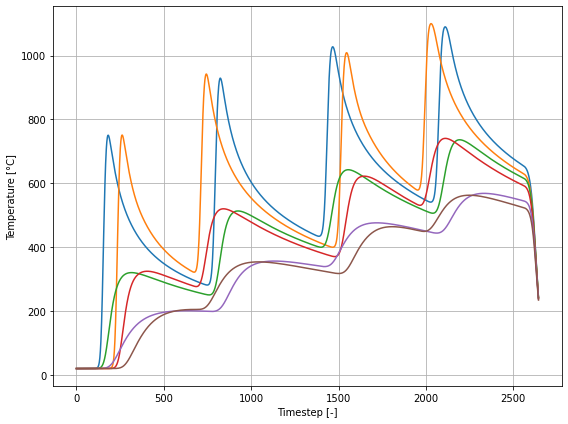

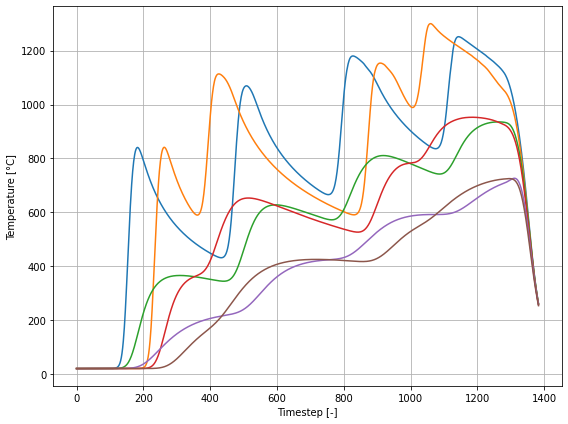

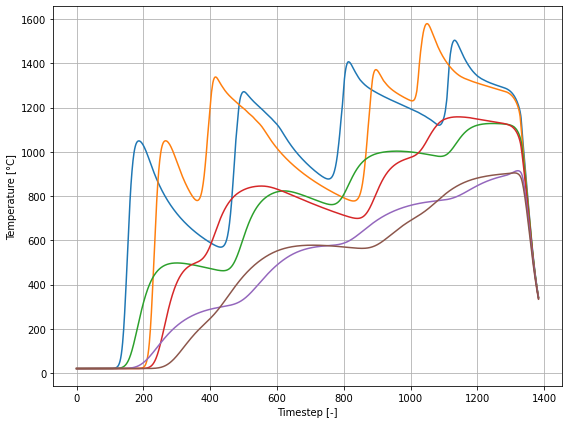

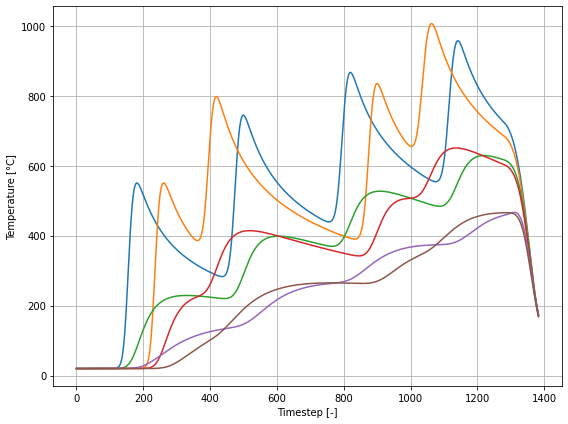

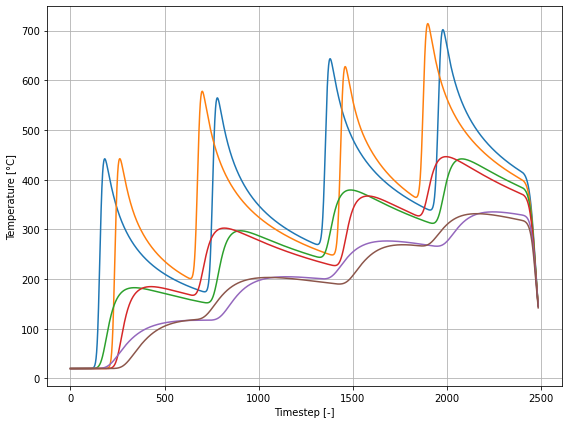

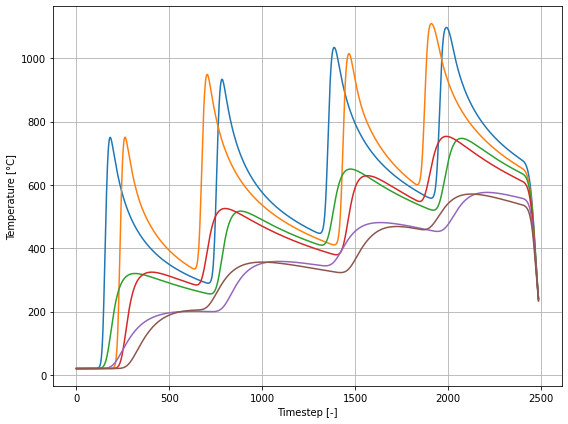

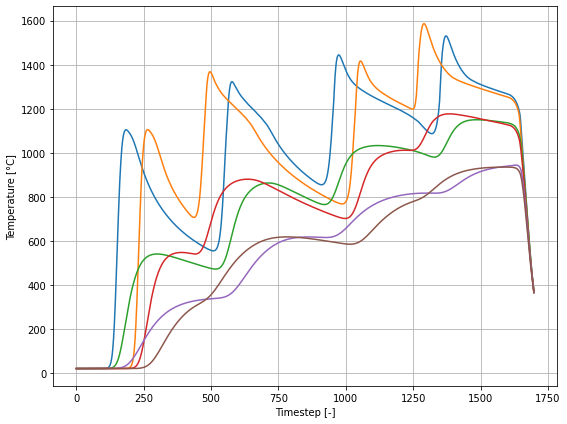

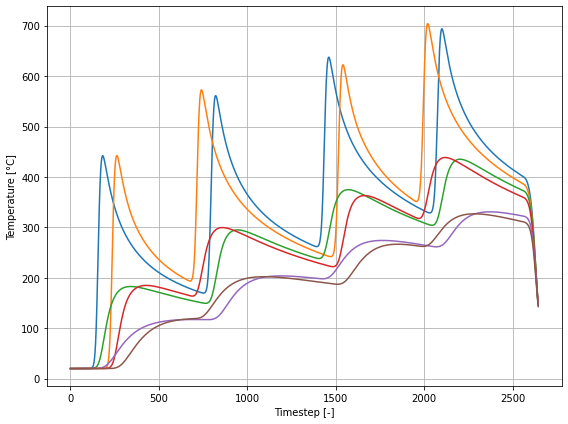

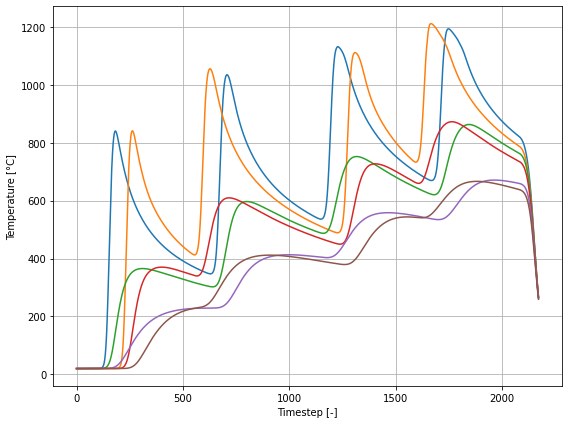

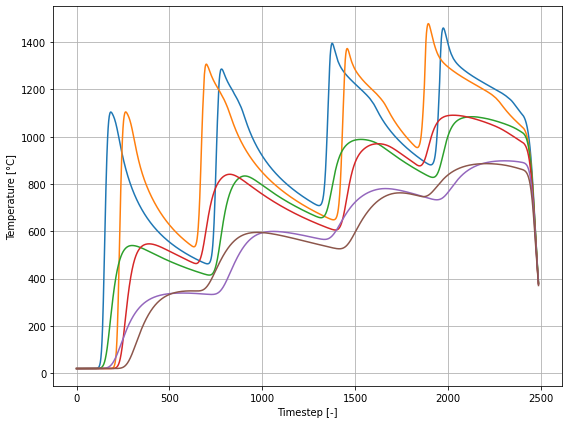

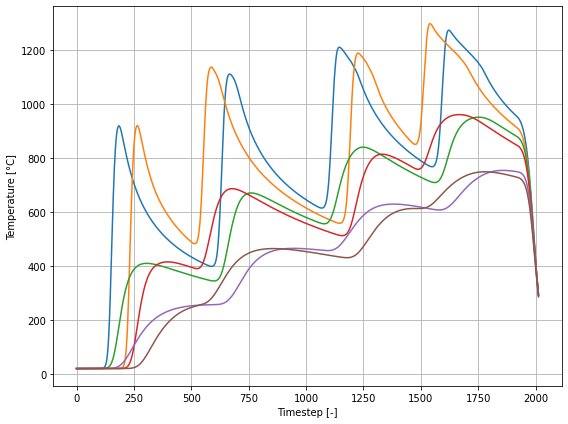

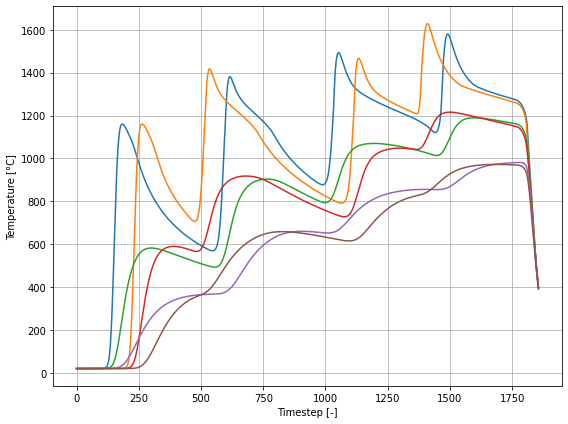

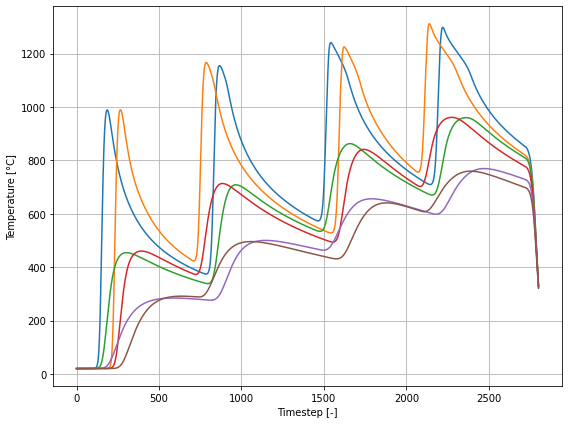

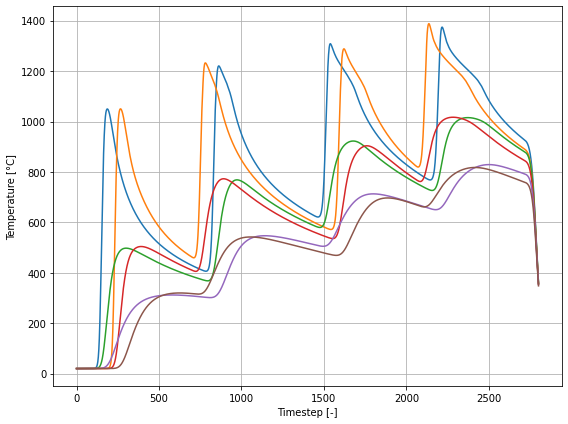

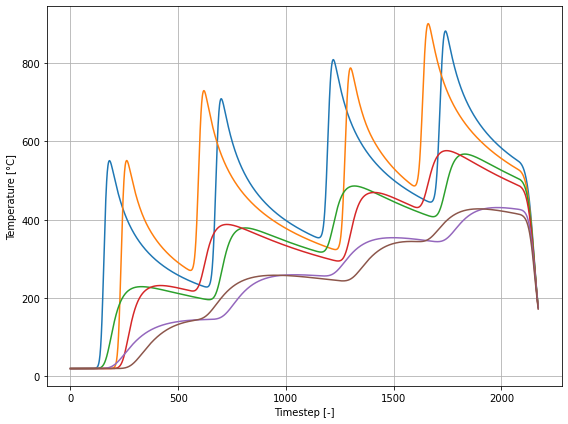

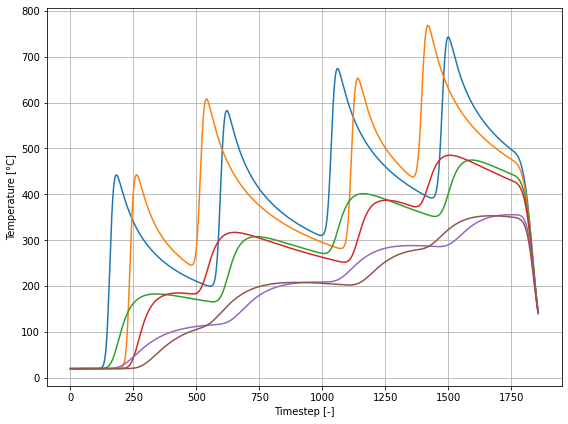

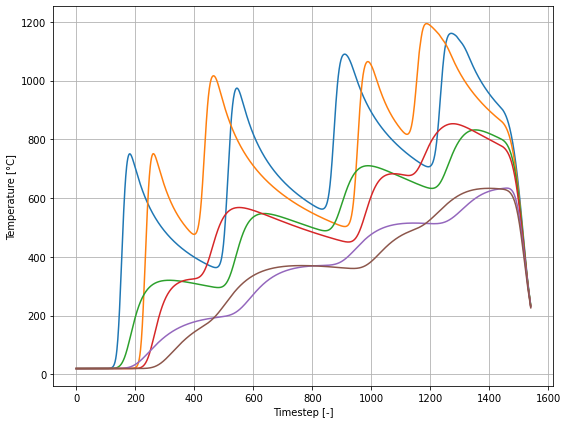

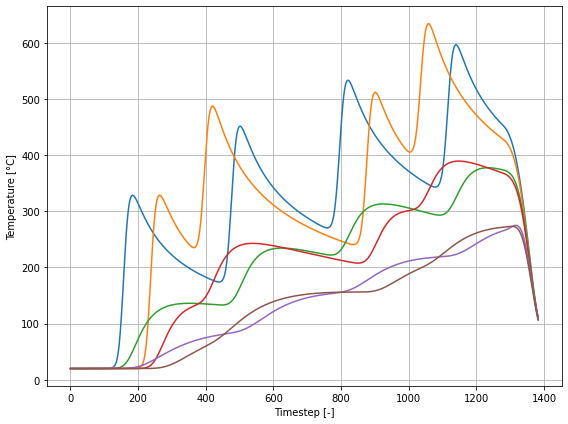

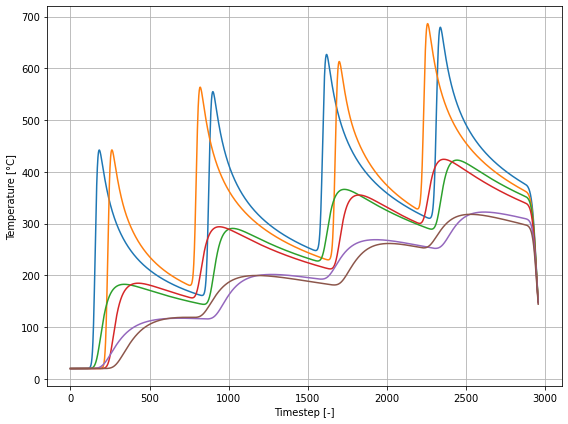

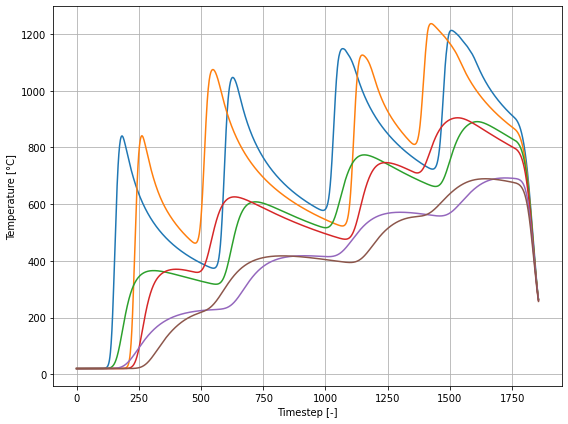

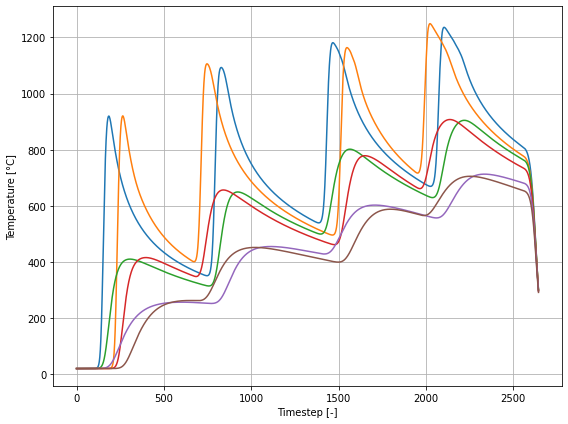

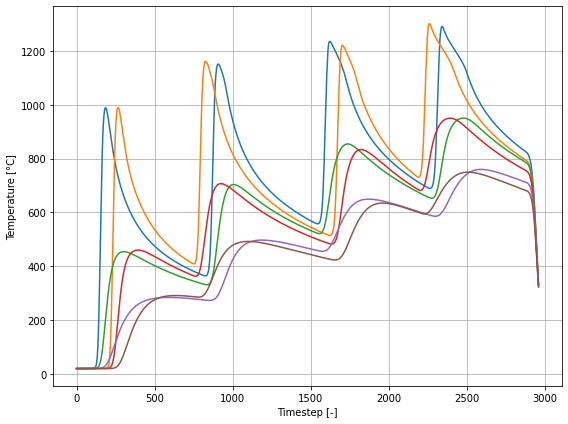

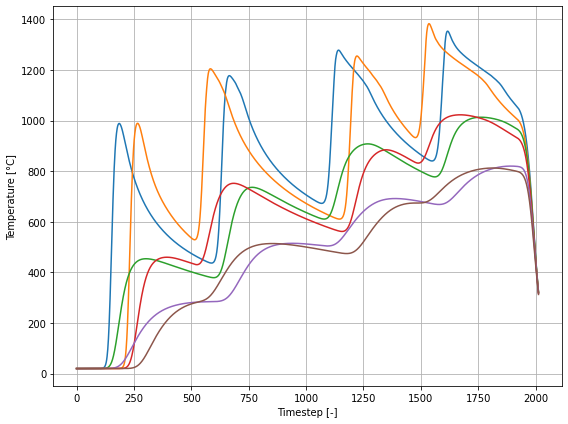

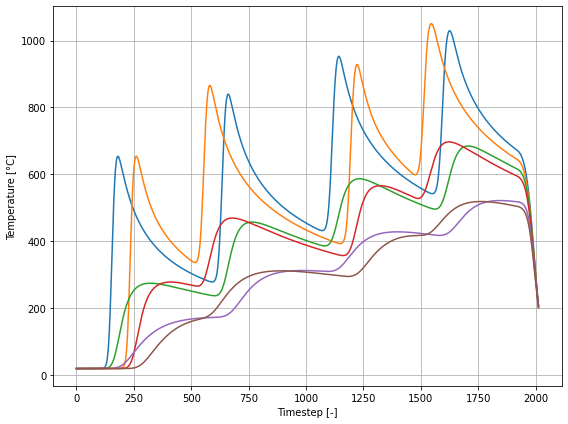

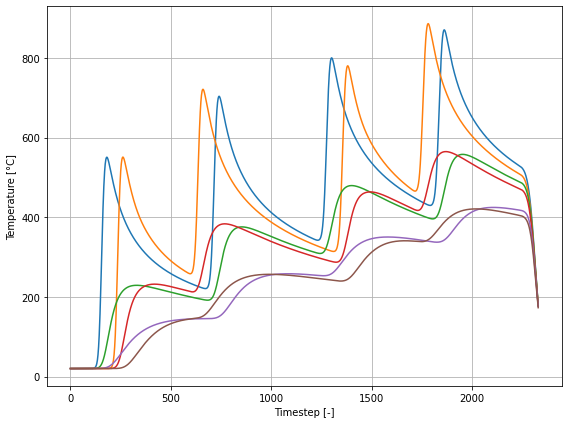

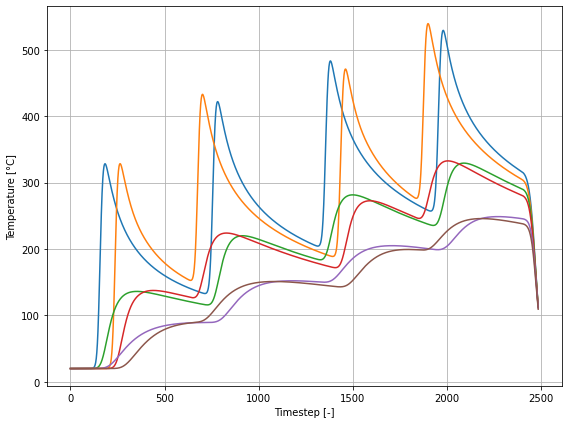

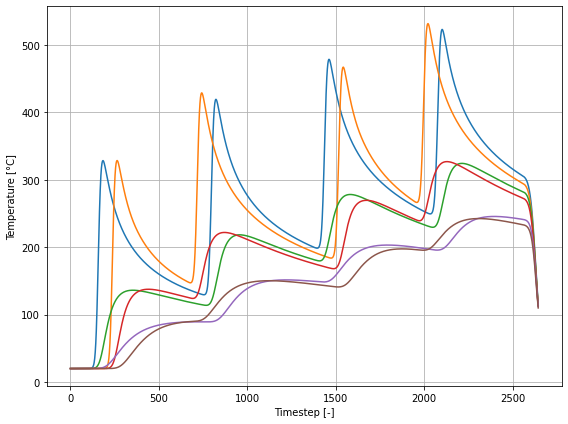

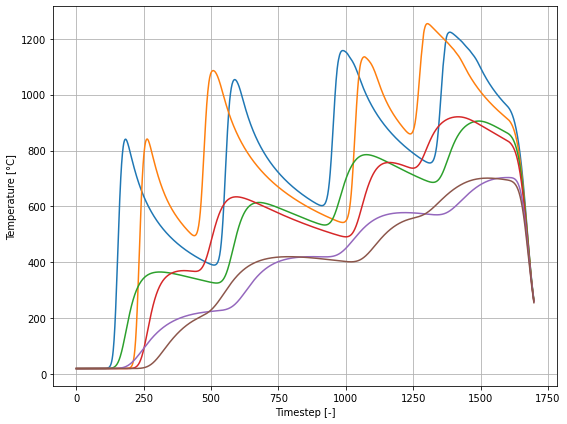

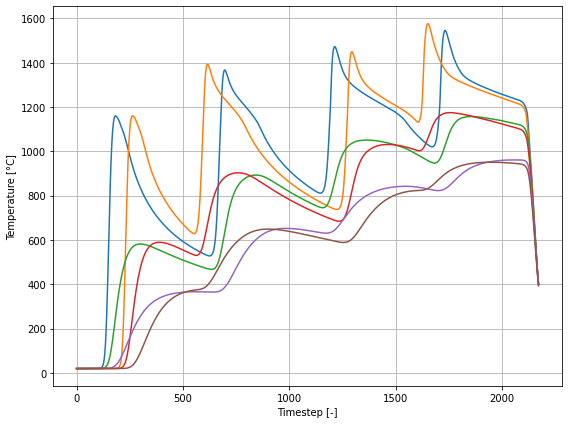

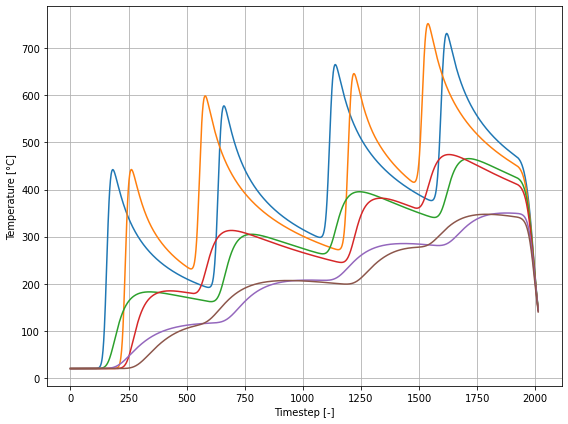

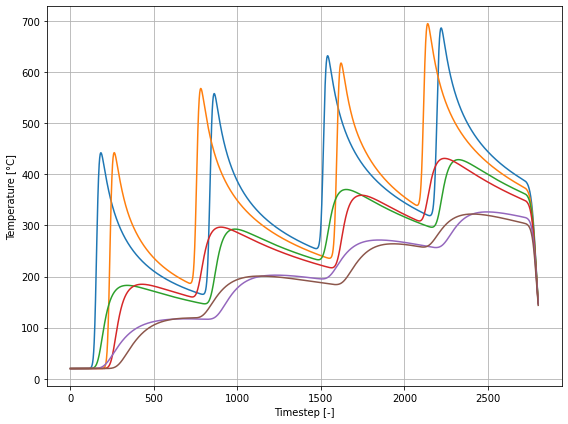

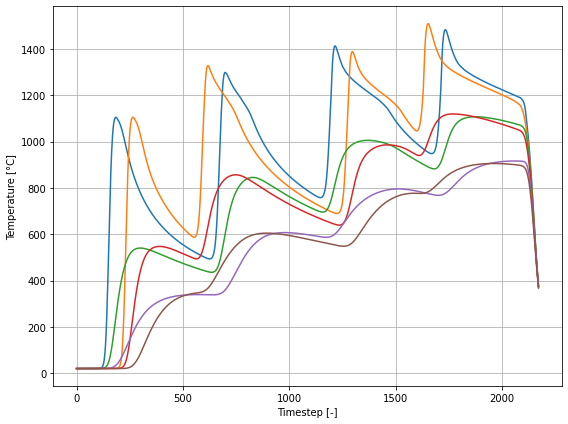

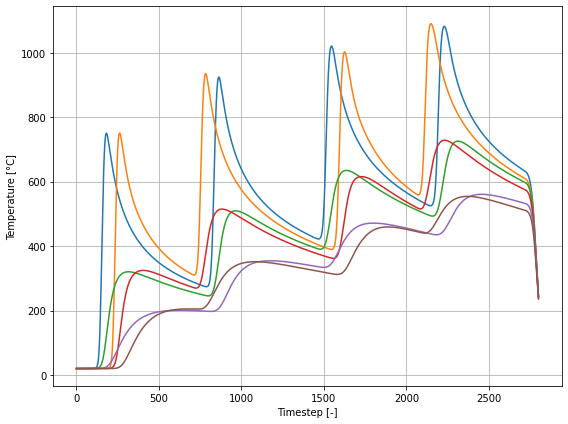

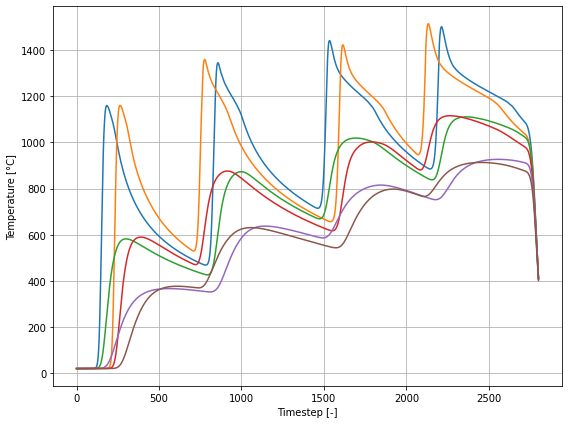

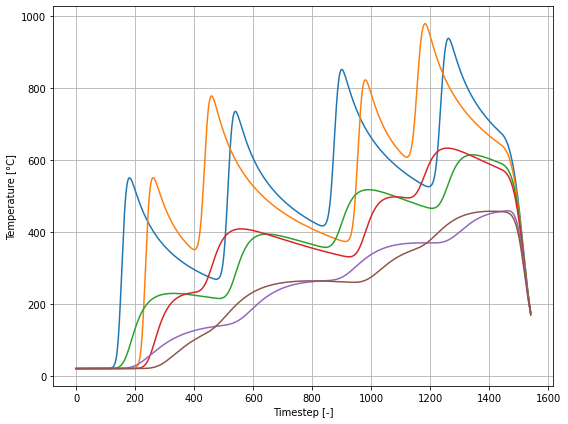

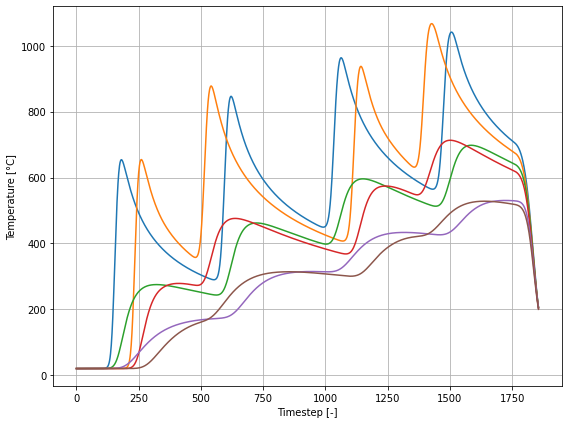

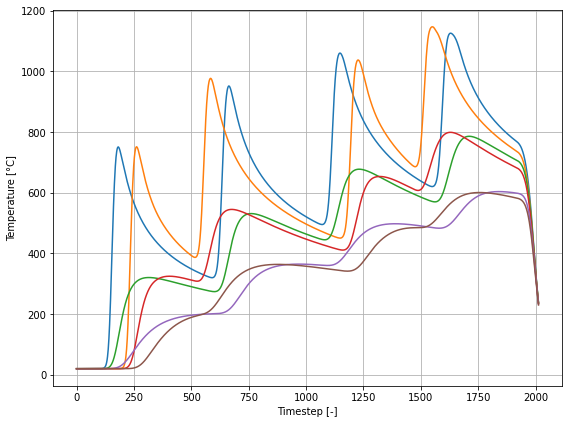

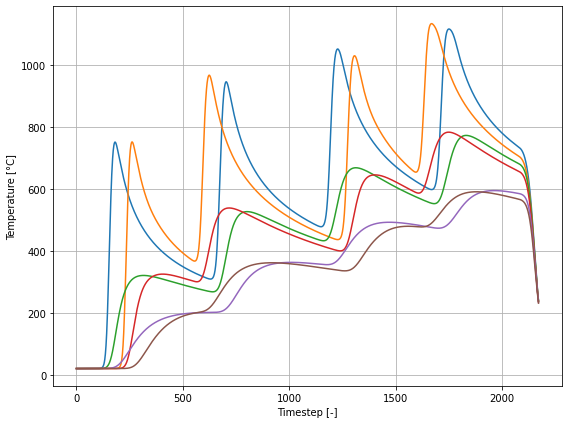

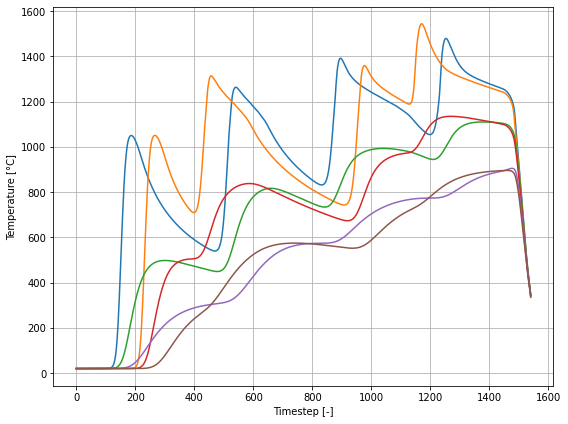

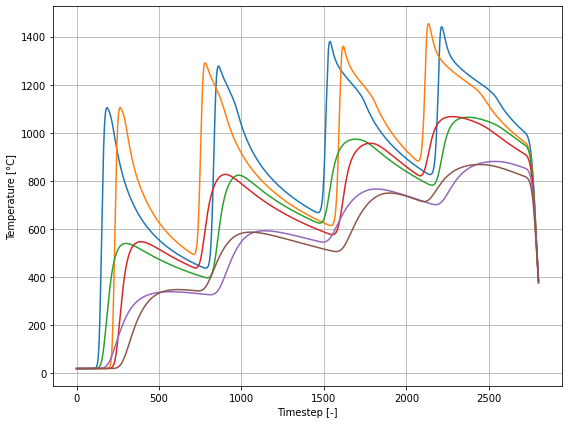

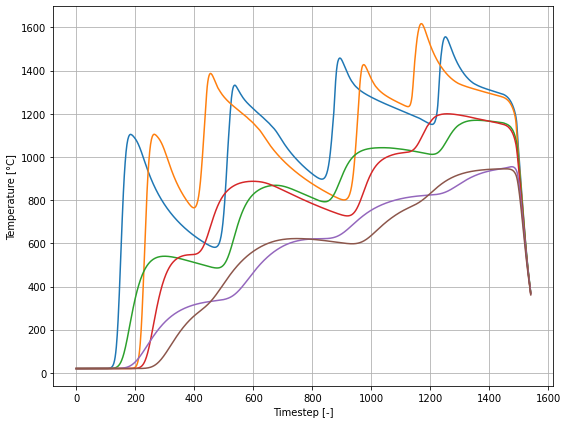

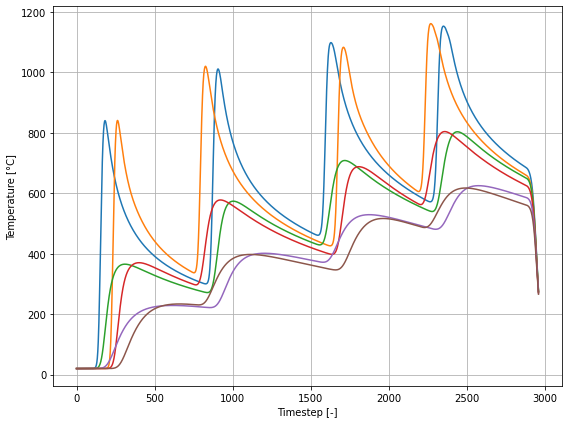

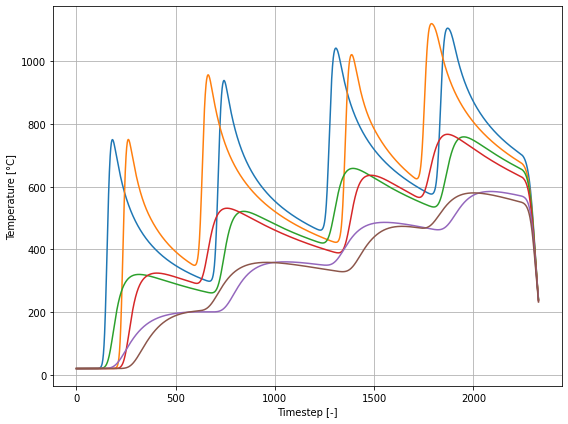

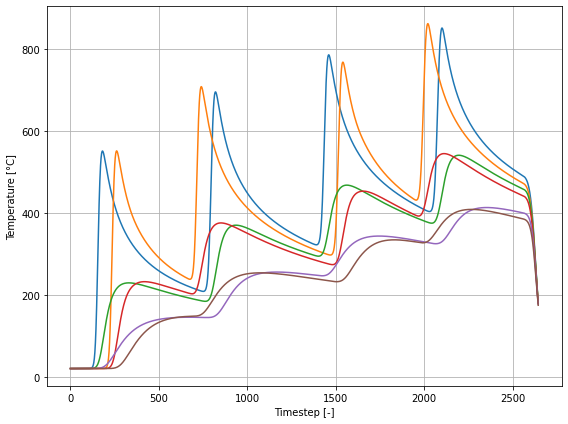

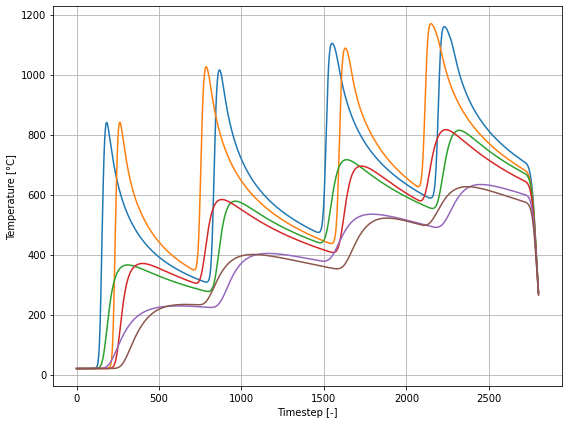

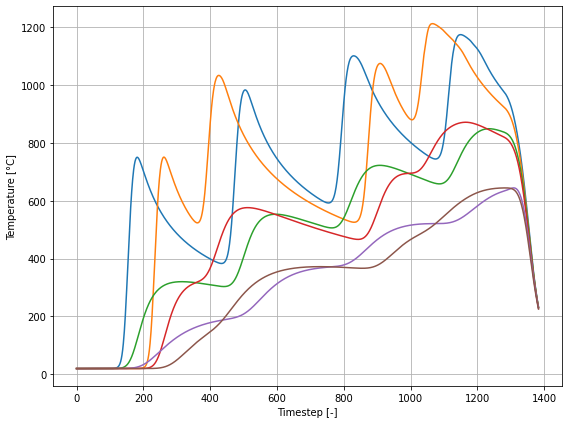

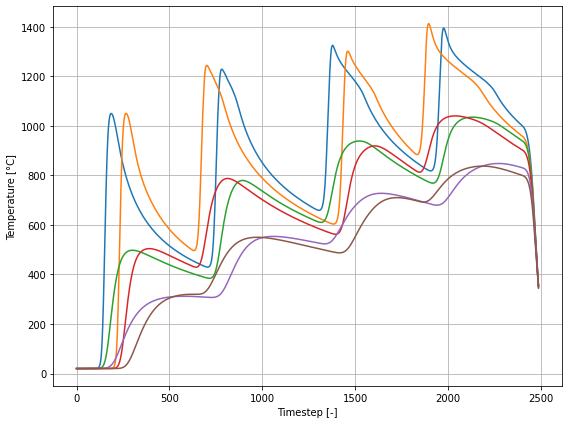

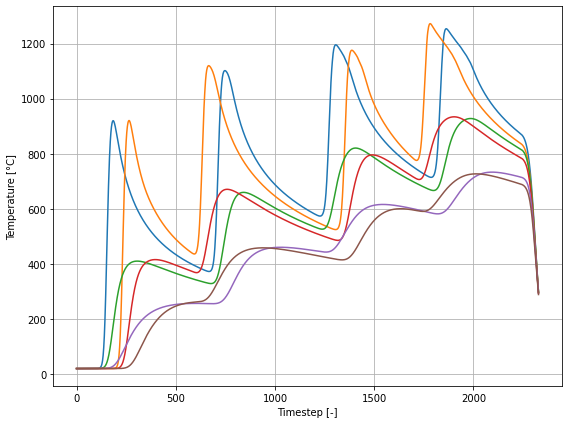

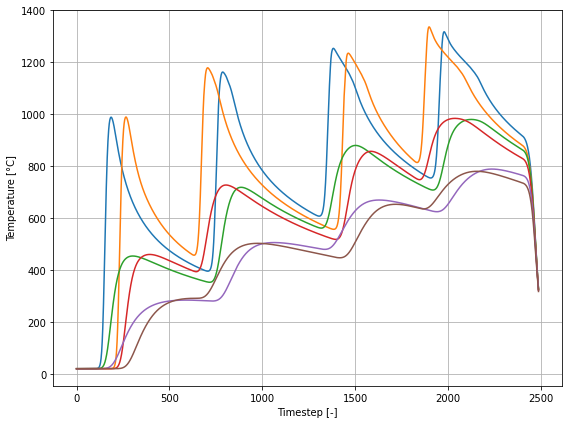

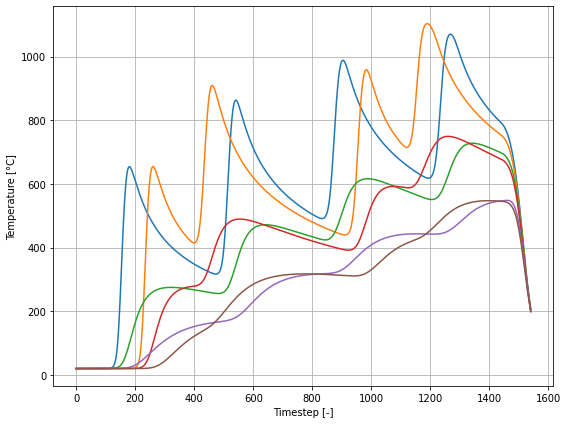

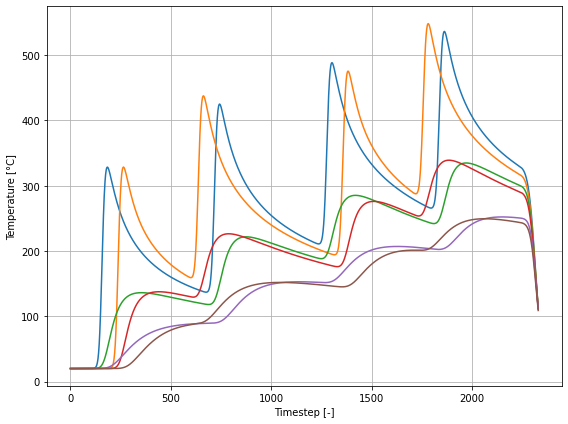

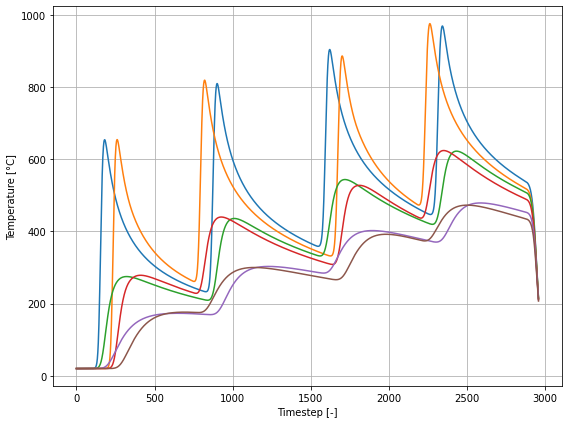

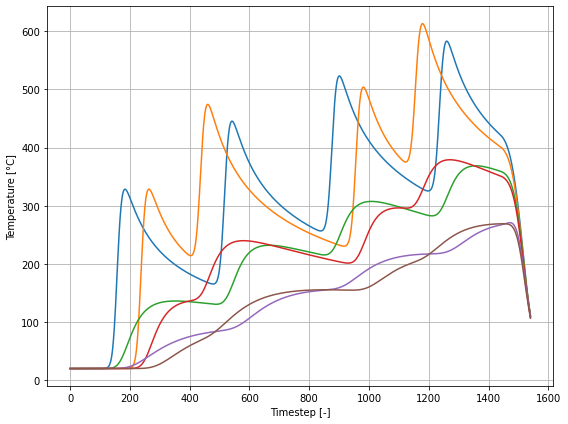

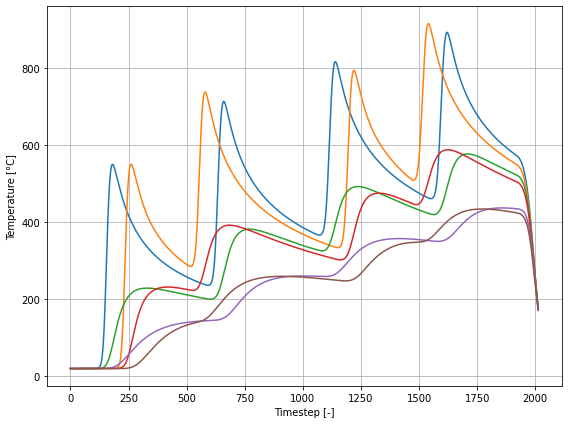

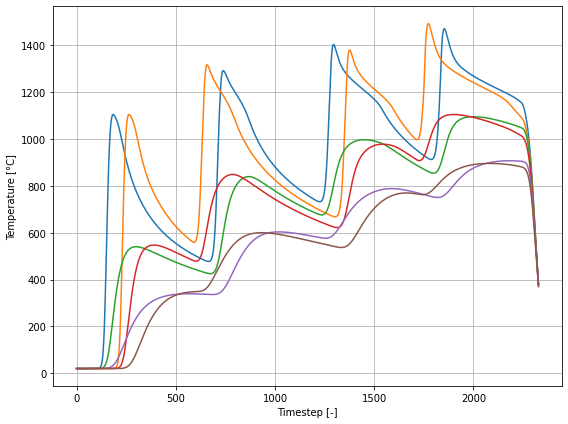

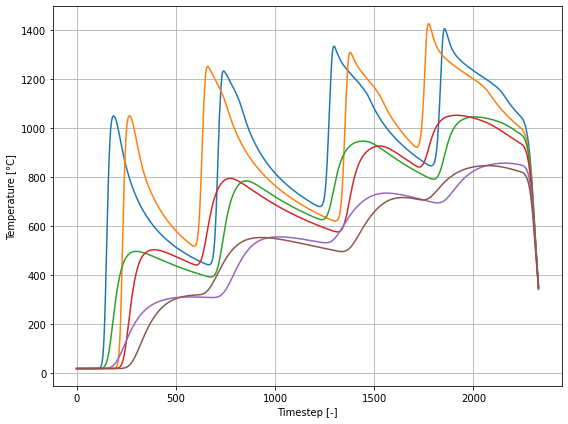

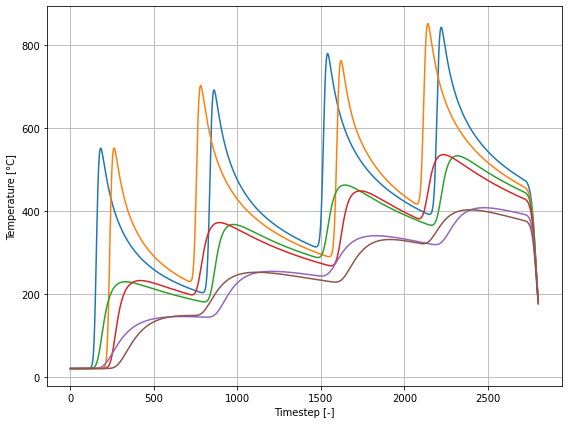

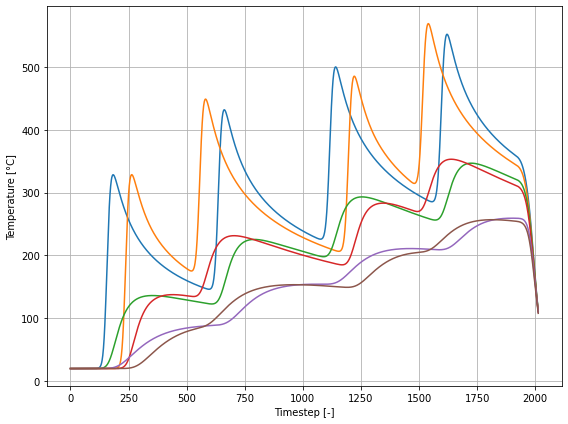

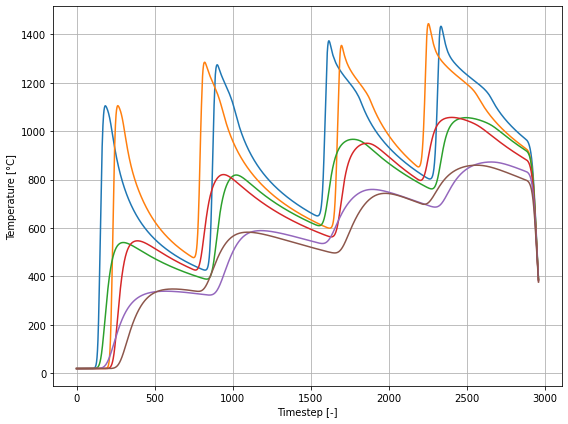

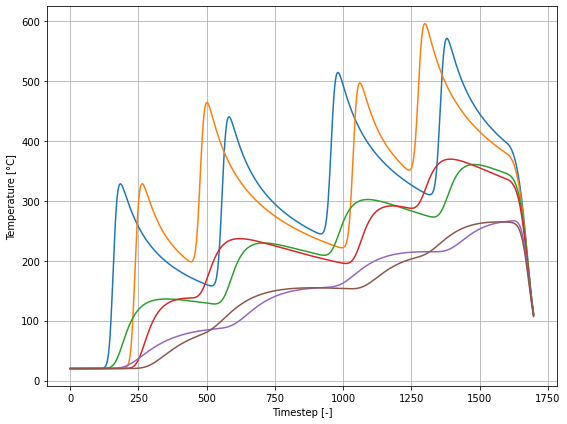

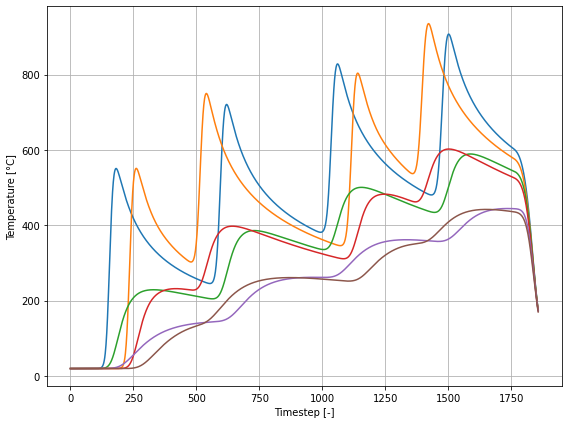

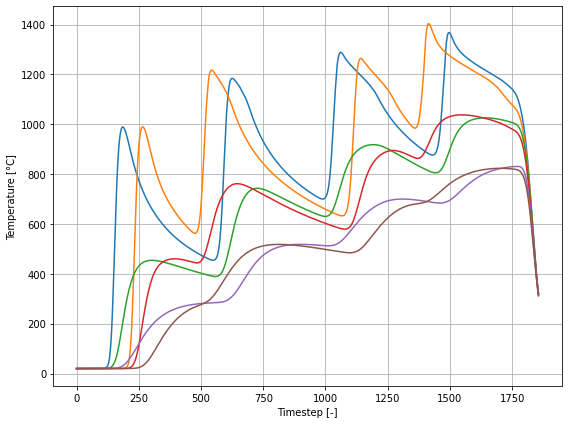

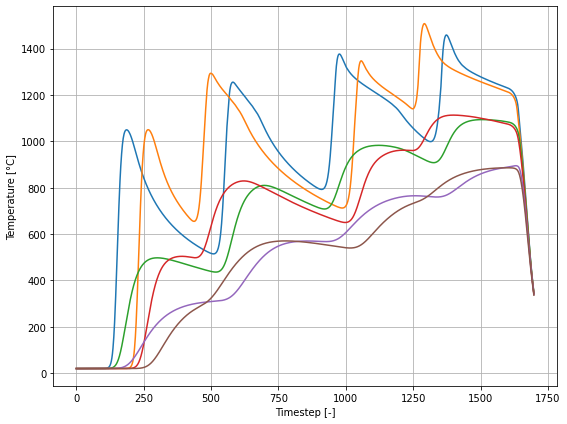

In [25]:
os.makedirs('output', exist_ok=True)

# Plot temperatures for each (b, P) pair
for b, P in bp_to_index:
    indices = bp_to_index[b, P]
    targets = train_targets[indices]
    
    plt.figure()
    for i in range(6):
        plt.plot(targets[:, i], color='C{}'.format(i))
        
    plt.grid()
    plt.xlabel(r'Timestep [-]')
    plt.ylabel(r'Temperature [°C]')
    plt.tight_layout()
    plt.savefig('output/b-{}_P-{}.pdf'.format(b, P), transparent=True)